# Agent-Based Modelling

### _Shreya Raghavendra (13756877), Boyan Mihaylov (15067602), Eline van de Lagemaat (11892900), Sofia Tavitian (14824248), Chayenne Olumuyiwa (12055662)_

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload

import model as mdl
import agent as agt
import visualisation as vis
import sensitivity_analysis as sa

In [160]:
import warnings
warnings.filterwarnings("ignore")

## 1. Model Setup

In [63]:
reload(mdl)
reload(agt)
reload(vis)

reload(mdl)
reload(agt)
reload(vis)

<module 'visualisation' from 'd:\\GitHub\\agent-based-modelling\\Project\\visualisation.py'>

d:\GitHub\agent-based-modelling\Project\model.py:43: UserWarning: Default value 1 (int) might not be best suitable with dtype=float64.
  self.grid.add_property_layer(PropertyLayer('substrate', self.width, self.height, 1))
d:\GitHub\agent-based-modelling\Project\model.py:43: FutureWarning: The new PropertyLayer and _PropertyGrid classes experimental. It may be changed or removed in any and all future releases, including patch releases.
We would love to hear what you think about this new feature. If you have any thoughts, share them with us here: https://github.com/projectmesa/mesa/discussions/1932
  self.grid.add_property_layer(PropertyLayer('substrate', self.width, self.height, 1))
d:\GitHub\agent-based-modelling\Project\model.py:47: UserWarning: Default value 1 (int) might not be best suitable with dtype=float64.
  self.grid.add_property_layer(PropertyLayer('soil_fertility', self.width, self.height, 1))


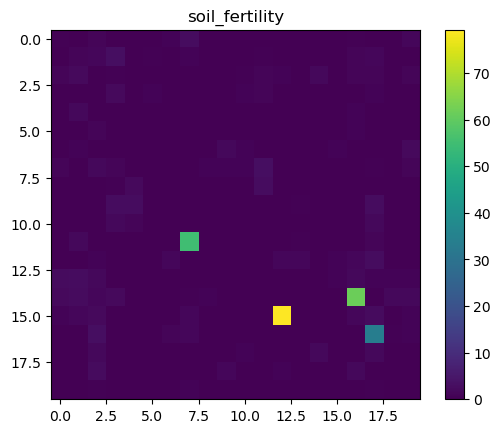

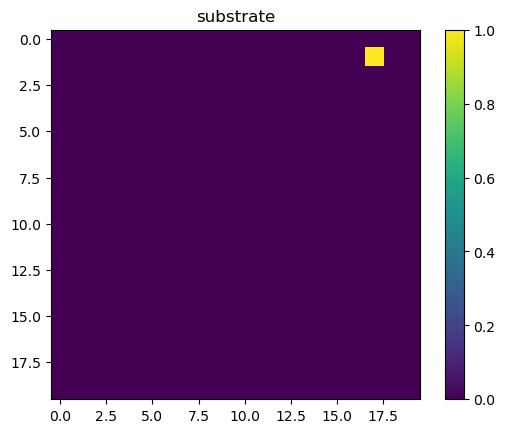

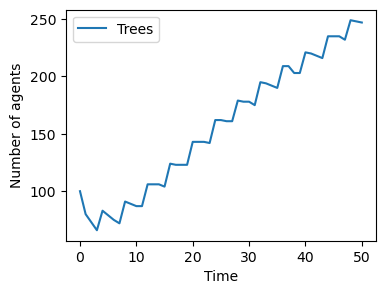

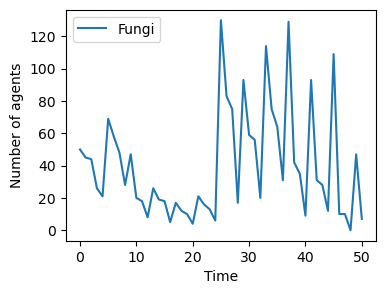

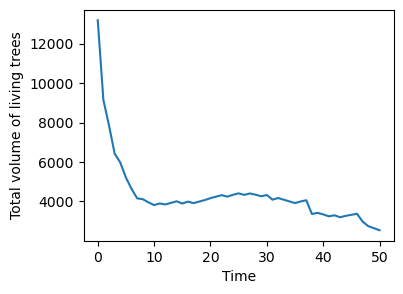

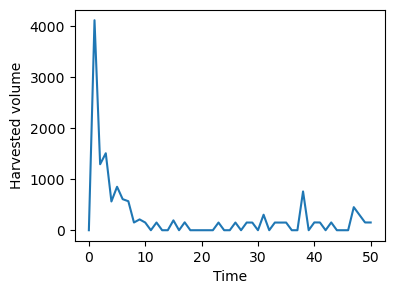

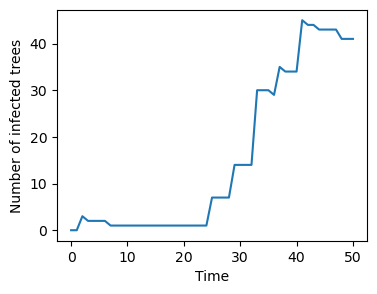

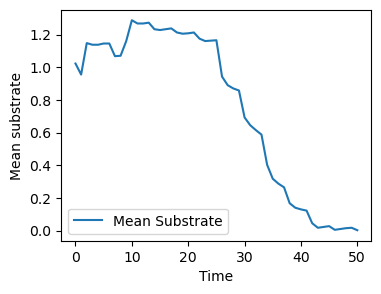

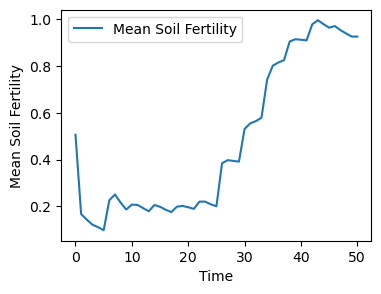

In [2]:
%matplotlib inline

width = 20
height = 20
n_init_trees = 100
n_init_fungi = 50
harvest_params = [150,0.5,0.5]
fert_comp_ratio_exponent = -0.3
model = mdl.Forest(width, height, n_init_trees, n_init_fungi, harvest_params, fert_comp_ratio_exponent)
model.run_model(n_steps=50)

vis.plot_property_layer(model, "soil_fertility")
vis.plot_property_layer(model, "substrate")

data = model.datacollector.get_model_vars_dataframe()

fig, ax = plt.subplots()
fig.set_size_inches(4, 3)
data[["Trees"]].plot(ax=ax)
ax.set(xlabel='Time', ylabel='Number of agents')
plt.show()

fig, ax = plt.subplots()
fig.set_size_inches(4, 3)
data[["Fungi"]].plot(ax=ax)
ax.set(xlabel='Time', ylabel='Number of agents')
plt.show()

fig, ax = plt.subplots()
fig.set_size_inches(4, 3)
data["Living Trees Total Volume"].plot(ax=ax)
ax.set(xlabel='Time', ylabel='Total volume of living trees')
plt.show()

fig, ax = plt.subplots()
fig.set_size_inches(4, 3)
data["Harvested volume"].plot(ax=ax)
ax.set(xlabel='Time', ylabel='Harvested volume')
plt.show()

fig, ax = plt.subplots()
fig.set_size_inches(4, 3)
data["Infected Trees"].plot(ax=ax)
ax.set(xlabel='Time', ylabel='Number of infected trees')
plt.show()

fig, ax = plt.subplots()
fig.set_size_inches(4, 3)
data[["Mean Substrate"]].plot(ax=ax)
ax.set(xlabel='Time', ylabel='Mean substrate')
plt.show()

fig, ax = plt.subplots()
fig.set_size_inches(4, 3)
data[["Mean Soil Fertility"]].plot(ax=ax)
ax.set(xlabel='Time', ylabel='Mean Soil Fertility')
plt.show()

In [5]:
reload(vis)
reload(agt)
reload(mdl)

reload(vis)
reload(agt)
reload(mdl)

<module 'model' from 'd:\\GitHub\\agent-based-modelling\\Project\\model.py'>

In [6]:
model_params = {
    "n_init_trees": {
        "type": "SliderInt",
        "value": 100,
        "label": "Number of agents:",
        "min": 10,
        "max": 100,
        "step": 1,
    },
    "n_init_fungi": {
        "type": "SliderInt",
        "value": 50,
        "label": "Number of agents:",
        "min": 10,
        "max": 100,
        "step": 1,
    },
    "width": 20,
    "height": 20,
    "harvest_params": [150,4,0.5],
    "fert_comp_ratio_exponent": -0.3,
    "top_n_sites_percent": 0.01
}

page = vis.create_jupyter_viz(mdl.Forest, model_params, measures=["Trees", "Fungi", "Living Trees Total Volume", "Harvested volume",
                                                                  "Infected Trees", "Mean Substrate", "Mean Soil Fertility"])

page

Cannot show ipywidgets in text

## 2. Sensitivity Analysis

In [12]:
reload(mdl)
reload(sa)
reload(agt)

<module 'agent' from 'd:\\GitHub\\agent-based-modelling\\Project\\agent.py'>

In [16]:
problem = {
    'num_vars': 5,
    'names': ['harvest_volume', 'harvest_nbrs', 'harvest_prob', 'fert_comp_ratio_exponent', 'top_n_sites_percent'],
    'bounds': [[50, 300],
               [0, 8],
               [0, 1],
               [-1, 1],
               [0, 1]]
}

data = sa.run_batches(mdl.Forest, problem , outputs=["Trees", "Fungi"], n_max_timesteps=800, n_replicates=2, n_distinct_samples=2)

25.00% done


  0%|          | 0/2 [00:00<?, ?it/s]

In [72]:
print(data.head(120))

     RunId  Step  n_init_trees  n_init_fungi  Trees  Fungi
0        0     0            18            52     18     52
1        0     1            18            52     18     42
2        0     2            18            52     18     40
3        0     3            18            52     18     23
4        0     4            18            52     38     14
..     ...   ...           ...           ...    ...    ...
115      1    14            18            52     76     20
116      1    15            18            52     75     18
117      1    16            18            52     95     10
118      1    17            18            52     95     33
119      1    18            18            52     94     23

[120 rows x 6 columns]
